Задачи 1 и 2
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

Подсказка: постройте закон распределения случайной величины X.


Закон распределения случайной величины X (вероятность правильно ответить на
определенное количество вопросов:
x 0 1 2 3 4 5
P(X=x) 0,2373 0,3955 0,2637 0,0879 0,0146 0,001

М = 0*0,2373 + 2*0,3955 + 2*0,2637 + 3*0,0879 + 4*0,0146 + 5*0,001 =
= 0 + 0,3955 + 0,5273 + 0,2637 + 0,0586 + 0,0049 = 1,25

D(X) = ((0 – 1,25)^2)*0,2373 + ((1 – 1,25)^2)*0,3955 + ((2 – 1,25)^2)*0,2637 + ((3 –1,25)^2)*0,0879 + ((4 – 1,25)^2)*0,0146 + ((5 – 1,25)^2)*0,001 = 1,5625*0,2373 + 0,0625*0,3955 + 0,5625*0,2637 + 3,0625*0,0879 + 7,5625*0,0146 +14,0625*0,001 == 0,3708 + 0,0247 + 0,1483 + 0,2692 + 0,1108 + 0,0137 = 0,9375

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def combination(n, k):
  #функция Сочетания

    A_n_k = np.math.factorial(n)
    P_k = np.math.factorial(k)*np.math.factorial(n-k)
    return A_n_k//P_k

In [44]:
x_list = np.array([el for el in range(6)])
#Рассчитаем вероятности дать правильный ответ и сведем ответы в словарь
probabilities = []
for i in x_list:
    P_i = combination(5, i)*(1/4 ** i) * ((1-1/4)**(5 - i))
    probabilities.append(P_i)
probabilities = np.array(probabilities)
probabilities

array([0.23730469, 0.39550781, 0.26367188, 0.08789062, 0.01464844,
       0.00097656])

In [45]:
#Рассчитаем мат.ожидание
M_X = (x_list * probabilities).sum()
print(M_X)

1.25


In [46]:
y_values = x_list - M_X
y_values
z_values = y_values ** 2
z_values

array([ 1.5625,  0.0625,  0.5625,  3.0625,  7.5625, 14.0625])

In [47]:
D_X = (z_values * probabilities).sum()
print(D_X)

0.9375


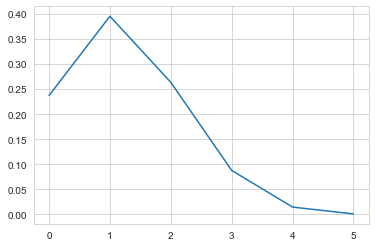

In [48]:
plt.plot(probabilities)

Задача 3
Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

In [1]:
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [2]:
lambda_ = 10

In [7]:
poisson_proba(k=10, lambda_=lambda_)

0.1251100357211333

In [15]:
1 - sum(poisson_proba(k=i, lambda_=lambda_) for i in range(16))

0.04874040330397855

Ответ число N=15

Задача 4
Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

In [ ]:
import numpy as np


In [37]:
def combinations(n: int, k: int) -> int:
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))


In [39]:
#Сначала находим общее количество сочетаний, затем вычитаем количество сочетаний с наборами без тузов
fire = 6
target = 6
p = 0.01
pp = 0

In [40]:
while pp < 0.9:
    p_event = combinations(fire, target) * (p ** target) * ((1 - p) ** (fire - target))
    pp = pp + p_event
    print(fire, p_event, pp)
    fire += 1

6 1.0000000000000002e-12 1.0000000000000002e-12
7 6.930000000000001e-12 7.930000000000002e-12
8 2.7442800000000005e-11 3.5372800000000004e-11
9 8.150511600000002e-11 1.1687791600000003e-10
10 2.0172516210000003e-10 3.1860307810000003e-10
11 4.3935740305380004e-10 7.579604811538001e-10
12 8.699276580465241e-10 1.6278881392003242e-09
13 1.599424137008395e-09 3.227312276208719e-09
14 2.7710023173670444e-09 5.998314593575763e-09
15 4.572153823655623e-09 1.0570468417231387e-08
16 7.242291656670507e-09 1.7812760073901893e-08
17 1.1080706234705877e-08 2.8893466308607768e-08
18 1.6454848758538226e-08 4.534831506714599e-08
19 2.3808900396008e-08 6.915721546315399e-08
20 3.36725877029256e-08 1.0282980316607959e-07
21 4.667020655625488e-08 1.4950000972233447e-07
22 6.352981867470195e-08 2.1302982839703643e-07
23 8.509258654252728e-08 2.981224149395637e-07
24 1.1232221423613599e-07 4.104446291756997e-07
25 1.4631446328128244e-07 5.567590924569822e-07
26 1.8830671424301049e-07 7.450658066999926e-07

Ответ: 230